In [140]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.layers import Input, Dense
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam

##### 1. Data

a) Each row of csvImages 10k x 784.csv contains the gray scale values of a 28 x 28 image. Load this data into a pandas dataframe. Convert the dataframe to a numpy array using pandas.values. Print the shape of the data.

In [141]:
# Load the CSV file and convert it to a NumPy array
data = pd.read_csv('archive/csvTestImages 10k x 784.csv').values 

# Print the shape of the data
print("Shape of the data:", data.shape)

Shape of the data: (9999, 784)


b) Normalize by dividing each value by 255. In order to display the images, reshape the array so each image is 28 x 28 using numpy.ndarray.reshape. Use matplotlib.plot.imshow and matplotlib.plot.subplot to give a plot of the first five images using the 'gray' colour map. In order to put the data back in the original shape for input to the neural network, reshape each image to be 784 (one-dimensional). 

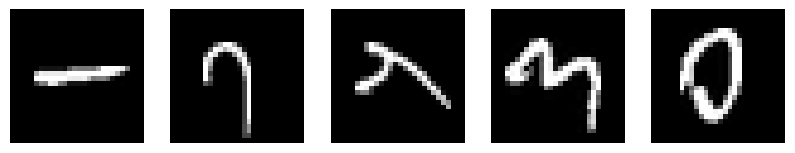

Shape of flattened data: (9999, 784)


In [142]:
# Normalize the data by dividing by 255
data_normalized = data / 255.0

# Reshape (NumPy array) the data for visualization (28x28 images)
data_reshaped = data_normalized.reshape(-1, 28, 28) 

# Plot the first 5 images using matplotlib
plt.figure(figsize=(10, 2))
for i in range(5):
    plt.subplot(1, 5, i + 1)
    plt.imshow(data_reshaped[i], cmap='gray')
    plt.axis('off')
plt.show()

# Reshape the images back to 784 for neural network input
data_flattened = data_reshaped.reshape(-1, 784)

# Print the shape to confirm it has been flattened correctly
print("Shape of flattened data:", data_flattened.shape)

##### 2. Modeling

a) Use keras.layers to create an input layer that matches the dimensions of your data.

In [143]:
# Define the input layer with the shape matching your flattened image data (784,)
input_layer = Input(shape=(784,))

# Print to confirm the layer
print(input_layer)

KerasTensor(type_spec=TensorSpec(shape=(None, 784), dtype=tf.float32, name='input_9'), name='input_9', description="created by layer 'input_9'")


<span style='color:red'>

Explanation:
- Input(shape=(784,)): This defines an input layer with 784 neurons, which corresponds to the 784 pixels in each flattened 28x28 image.
- This input_layer can now be used as the input to your model when constructing the full autoencoder or any other neural network.

</span>

b) Use keras.layers to create an encoding stage that has at least two layers and reduces the size of the data to 50% or less (less is better). You will need to choose activation functions.

In [144]:
# Encoding stage: progressively reducing the size
encoded = Dense(256, activation='relu')(input_layer)  # First hidden layer, reduce to 256 neurons
encoded = Dense(128, activation='relu')(encoded)      # Second hidden layer, reduce to 128 neurons
encoded = Dense(64, activation='relu')(encoded)       # Third hidden layer, reduce to 64 neurons

# Print the final encoded layer to confirm the size reduction
print(encoded)

KerasTensor(type_spec=TensorSpec(shape=(None, 64), dtype=tf.float32, name=None), name='dense_96/Relu:0', description="created by layer 'dense_96'")


<span style='color:red'>

Explanation:
- First Layer (Dense(256)): Reduces the data from 784 to 256 neurons with a ReLU activation function.
- Second Layer (Dense(128)): Further reduces the data from 256 to 128 neurons.
- Third Layer (Dense(64)): Reduces the data to 64 neurons, which is less than 50% of the original size (which is 784).

</span>

c) Use keras.layers to create a decoding stage that has at least two layers and restores the data to its original size. You will need to choose activation functions.

In [145]:
# Decoding stage
decoded = Dense(128, activation='relu')(encoded)
decoded = Dense(256, activation='relu')(decoded)
decoded = Dense(784, activation='softmax')(decoded)  # Restoring to original size

# Autoencoder model
autoencoder = Model(input_layer, decoded)

# Compile the autoencoder
autoencoder.compile(optimizer='adam', loss='binary_crossentropy')

# Print the summary of the model
autoencoder.summary()

Model: "model_30"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_9 (InputLayer)        [(None, 784)]             0         
                                                                 
 dense_94 (Dense)            (None, 256)               200960    
                                                                 
 dense_95 (Dense)            (None, 128)               32896     
                                                                 
 dense_96 (Dense)            (None, 64)                8256      
                                                                 
 dense_97 (Dense)            (None, 128)               8320      
                                                                 
 dense_98 (Dense)            (None, 256)               33024     
                                                                 
 dense_99 (Dense)            (None, 784)               201

d) Compile the complete autoencoder network. You will need to choose a loss function and an optimizer. Train the autoencoder using the image data.

In [146]:
# Train the autoencoder with the flattened image data
history = autoencoder.fit(data_flattened, data_flattened, 
                          epochs=20, 
                          batch_size=256, 
                          shuffle=True, 
                          validation_split=0.2)


Epoch 1/20
32/32 [==============================] - 1s 13ms/step - loss: 0.3944 - val_loss: 0.2681
Epoch 2/20
32/32 [==============================] - 0s 5ms/step - loss: 0.2380 - val_loss: 0.2285
Epoch 3/20
32/32 [==============================] - 0s 4ms/step - loss: 0.2026 - val_loss: 0.1864
Epoch 4/20
32/32 [==============================] - 0s 5ms/step - loss: 0.1671 - val_loss: 0.1582
Epoch 5/20
32/32 [==============================] - 0s 4ms/step - loss: 0.1465 - val_loss: 0.1425
Epoch 6/20
32/32 [==============================] - 0s 5ms/step - loss: 0.1343 - val_loss: 0.1321
Epoch 7/20
32/32 [==============================] - 0s 4ms/step - loss: 0.1259 - val_loss: 0.1255
Epoch 8/20
32/32 [==============================] - 0s 5ms/step - loss: 0.1199 - val_loss: 0.1202
Epoch 9/20
32/32 [==============================] - 0s 4ms/step - loss: 0.1146 - val_loss: 0.1146
Epoch 10/20
32/32 [==============================] - 0s 5ms/step - loss: 0.1101 - val_loss: 0.1113
Epoch 11/20
32/32 

<span style='color:red'>

Key Points:
- Epochs: The number of times the model sees the entire dataset during training. You can start with 50 epochs but adjust based on the performance.
- Batch size: The number of samples processed before the model is updated. 256 is a common choice, but you can adjust it.
- Shuffle: Ensures that the training data is shuffled before each epoch, which helps the model generalize better.
- Validation split: 20% of the data will be used for validation during training to monitor performance on unseen data.

</span>

c) Compile an encoder network from your trained input layer and encoding stage.

In [147]:
# Create the encoder model using the input layer and the encoded output
encoder = Model(input_layer, encoded)

# Compile the encoder (no need to compile if you're not training it further, but it’s good practice)
encoder.compile(optimizer='adam', loss='binary_crossentropy')

# Print the summary of the encoder model
encoder.summary()

Model: "model_31"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_9 (InputLayer)        [(None, 784)]             0         
                                                                 
 dense_94 (Dense)            (None, 256)               200960    
                                                                 
 dense_95 (Dense)            (None, 128)               32896     
                                                                 
 dense_96 (Dense)            (None, 64)                8256      
                                                                 
Total params: 242,112
Trainable params: 242,112
Non-trainable params: 0
_________________________________________________________________


<span style='color:red'>

Explanation:
- Model(input_layer, encoded): This creates a new model with the input as the original input layer and the output as the final encoding layer (the bottleneck layer, which has reduced the dimensions).
- Encoder Network: This network will now only return the encoded (compressed) representation of the input images.

</span>

In [148]:
# Encoded representation of the first 5 images
encoded_images = encoder.predict(data_flattened[:5])

# Print the shape of the encoded images
print("Shape of encoded images:", encoded_images.shape)

1/1 [==============================] - 0s 35ms/step
Shape of encoded images: (5, 64)


In [149]:
# Decoded reperesentation of the first 5 images
decoded_images = autoencoder.predict(data_flattened[:5])

# Print the shape of the encoded images
print("Shape of encoded images:", decoded_images.shape)

1/1 [==============================] - 0s 59ms/step
Shape of encoded images: (5, 784)


##### 3. Conclusions

a) Use matplotlib.plot.imshow and matplotlib.plot.subplot and your trained models to give a plot of the first five original images along the top row, the encoded versions of those same images along the second row, and the decoded versions along the bottom row. Return to question 2 and adjust the hyperparameters of your model until you are able to produce decoded images that represent the original images, with an encoding that uses as little data as possible; make a record of the adjustments you try in markdown.

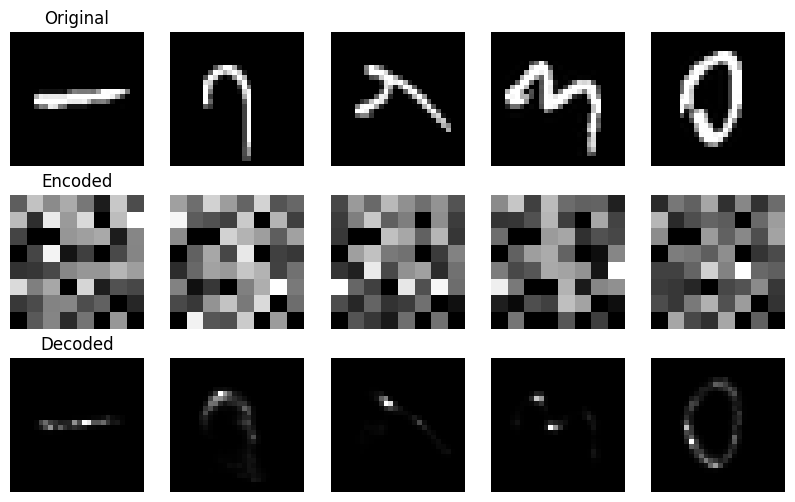

In [150]:
# Plot the original, encoded, and decoded images
plt.figure(figsize=(10, 6))

# Plot original images (Top row)
for i in range(5):
    plt.subplot(3, 5, i + 1)
    plt.imshow(data_flattened[i].reshape(28, 28), cmap='gray')
    plt.axis('off')
    if i == 0:
        plt.title("Original")

# Plot encoded images (Middle row)
for i in range(5):
    plt.subplot(3, 5, i + 6)
    # Reshape the encoded image into a smaller format for display (for example, 8x8 if the encoded size is 64)
    plt.imshow(encoded_images[i].reshape(8, 8), cmap='gray')  # Adjust based on encoding dimensions
    plt.axis('off')
    if i == 0:
        plt.title("Encoded")

# Plot decoded images (Bottom row)
for i in range(5):
    plt.subplot(3, 5, i + 11)
    plt.imshow(decoded_images[i].reshape(28, 28), cmap='gray')
    plt.axis('off')
    if i == 0:
        plt.title("Decoded")

plt.show()

In [151]:
# Encoding stage: progressively reducing the size with four layers
encoded_final = Dense(392, activation='relu')(input_layer) # reduced from 784 to 392
encoded_final = Dense(196, activation='relu')(encoded_final) # reduced from 392 to 196
encoded_final = Dense(98, activation='relu')(encoded_final) # reduced from 196 to 98

# Print the final encoded layer to confirm the size reduction
print(encoded_final)

KerasTensor(type_spec=TensorSpec(shape=(None, 98), dtype=tf.float32, name=None), name='dense_102/Relu:0', description="created by layer 'dense_102'")


In [152]:
# Decoding stage: progressively restoring the size with four layers
decoded_final = Dense(98, activation='relu')(encoded_final)
decoded_final = Dense (196, activation='relu')(decoded_final)
decoded_final = Dense(392, activation='relu')(decoded_final)
decoded_final = Dense(784, activation='sigmoid')(decoded_final)

# Autoencoder model
autoencoder_final = Model(input_layer, decoded_final)

# Compile the autoencoder
autoencoder_final.compile(optimizer='adam', loss='binary_crossentropy')

# Print the summary of the model
autoencoder_final.summary()

Model: "model_32"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_9 (InputLayer)        [(None, 784)]             0         
                                                                 
 dense_100 (Dense)           (None, 392)               307720    
                                                                 
 dense_101 (Dense)           (None, 196)               77028     
                                                                 
 dense_102 (Dense)           (None, 98)                19306     
                                                                 
 dense_103 (Dense)           (None, 98)                9702      
                                                                 
 dense_104 (Dense)           (None, 196)               19404     
                                                                 
 dense_105 (Dense)           (None, 392)               772

In [153]:
# Train the autoencoder with the flattened image data
history_final = autoencoder_final.fit(data_flattened, data_flattened, 
                          epochs=20, 
                          batch_size=256, 
                          shuffle=True, 
                          validation_split=0.2)


Epoch 1/20
32/32 [==============================] - 1s 14ms/step - loss: 0.3736 - val_loss: 0.2596
Epoch 2/20
32/32 [==============================] - 0s 9ms/step - loss: 0.2347 - val_loss: 0.2298
Epoch 3/20
32/32 [==============================] - 0s 8ms/step - loss: 0.2086 - val_loss: 0.1988
Epoch 4/20
32/32 [==============================] - 0s 6ms/step - loss: 0.1750 - val_loss: 0.1631
Epoch 5/20
32/32 [==============================] - 0s 6ms/step - loss: 0.1492 - val_loss: 0.1449
Epoch 6/20
32/32 [==============================] - 0s 5ms/step - loss: 0.1353 - val_loss: 0.1332
Epoch 7/20
32/32 [==============================] - 0s 5ms/step - loss: 0.1258 - val_loss: 0.1243
Epoch 8/20
32/32 [==============================] - 0s 10ms/step - loss: 0.1184 - val_loss: 0.1193
Epoch 9/20
32/32 [==============================] - 0s 6ms/step - loss: 0.1131 - val_loss: 0.1142
Epoch 10/20
32/32 [==============================] - 0s 6ms/step - loss: 0.1091 - val_loss: 0.1105
Epoch 11/20
32/32

In [154]:
# Create the encoder model using the input layer and the encoded output
encoder_final = Model(input_layer, encoded_final)

# Compile the encoder (no need to compile if you're not training it further, but it’s good practice)
encoder_final.compile(optimizer='adam', loss='binary_crossentropy')

# Print the summary of the encoder model
encoder_final.summary()

Model: "model_33"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_9 (InputLayer)        [(None, 784)]             0         
                                                                 
 dense_100 (Dense)           (None, 392)               307720    
                                                                 
 dense_101 (Dense)           (None, 196)               77028     
                                                                 
 dense_102 (Dense)           (None, 98)                19306     
                                                                 
Total params: 404,054
Trainable params: 404,054
Non-trainable params: 0
_________________________________________________________________


In [155]:
# Encoded representation of the first 5 images
encoded_images_final = encoder_final.predict(data_flattened[:5])

# Print the shape of the encoded images
decoded_images_final = autoencoder_final.predict(data_flattened[:5])

1/1 [==============================] - 0s 68ms/step


In [156]:
# Decoded reperesentation of the first 5 images
decoded_images_final = autoencoder_final.predict(data_flattened[:5])

# Print the shape of the encoded images
print("Shape of encoded images:", decoded_images_final.shape)

1/1 [==============================] - 0s 20ms/step
Shape of encoded images: (5, 784)


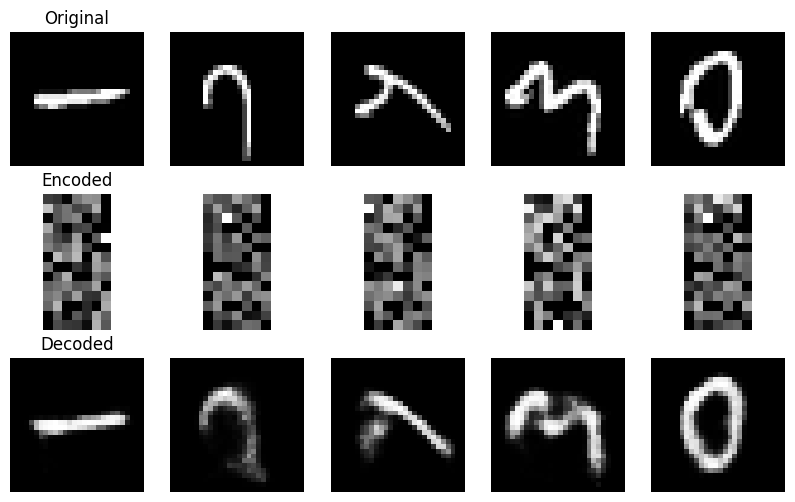

In [157]:
# Plot original, encoded, and decoded images side by side
plt.figure(figsize=(10, 6))

# Plot original images (Top row)
for i in range(5):
    plt.subplot(3, 5, i + 1)
    plt.imshow(data_flattened[i].reshape(28, 28), cmap='gray')
    plt.axis('off')
    if i == 0:
        plt.title("Original")

# Plot encoded images (Middle row)
for i in range(5):
    plt.subplot(3, 5, i + 6)
    plt.imshow(encoded_images_final[i].reshape(14, 7), cmap='gray')  # Adjust based on encoding dimensions
    plt.axis('off')
    if i == 0:
        plt.title("Encoded")

# Plot decoded images (Bottom row)
for i in range(5):
    plt.subplot(3, 5, i + 11)
    plt.imshow(decoded_images_final[i].reshape(28, 28), cmap='gray')
    plt.axis('off')
    if i == 0:
        plt.title("Decoded")

plt.show()

<span style="color: green">

##### Hyperparameter Adjustments:

We started with 3 layers for the encoding and decoding stage. These layers had 256, 128 and 64 neurons for the encoding layer. For the decoding layer, we started with 128 neurons to 256 and back to 784 neurons. We also used softmax as our first activation function for the last layer of the decoder. Once we plotted the images, we noticed that the images were not clear.

With that, we adjusted our encoders and decoders. For the encoders, we changed it to 3 layers with 392, 196 and 98 neurons, splitting the number of neurons by half every layer. For the decoder, we decided to go with 4 layers. Starting with 98 neurons until we got to the original numnber of neurons on the fourth layer. We also changed the activation function to sigmoid. The images came out clearer compared to our first attempt.

The first batch of code was not included because we noticed that even though the activation function has been changed to sigmoid, the images were still not clear. However, when we deleted the first bacth of code and only had the adjusted code, the result is as seen above, with the images being clearer.

</span>

b) Use markdown to describe how well the autoencoder is working, making reference to the plots.

<span style='color: green'>

Explanation:

- The encoder model is constructed by taking the original input layer and connecting it to the encoded layers (the compressed representation of the data).
- The encoder.summary() method displays the architecture of the encoder network, including the size of each layer and the number of parameters.

</span>

c) State the amount of data needed to store a single image, considering that a floating-point number is 4 bytes of data. Calculate how much memory will be saved as a percentage.

In [158]:
# Memory calculations
original_size = 784 * 4  # 784 floats, 4 bytes each
encoded_size = 98 * 4    # Encoded representation has 64 floats, 4 bytes each

# Calculate memory saved
memory_saved = original_size - encoded_size
percentage_saved = (memory_saved / original_size) * 100

# Print results
print(f"Original size: {original_size} bytes")
print(f"Encoded size: {encoded_size} bytes")
print(f"Memory saved: {memory_saved} bytes ({percentage_saved:.2f}%)")

Original size: 3136 bytes
Encoded size: 392 bytes
Memory saved: 2744 bytes (87.50%)
